construído com o TensorFlow, esse modelo conta com una Rede Neural Convolucional (CNN) adaptada para dados de sensores, devido à sua habilidade em extrair características relevantes e padrões temporais dos sinais dos sensores. Essa arquitetura é eficaz na identificação de condições que precedem falhas de equipamentos, permitindo a antecipação de manutenção e evitando paradas não planejadas. A CNN é ideal para processar e analisar os dados complexos e multidimensionais dos sensores!

In [ ]:
# import das libs que vamos usar :)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# carregando o dataset
data = pd.read_csv("/content/predictive_maintenance.csv")

In [ ]:
# visualizando os dados do dataset
print(data.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [ ]:
# dividindo os dados em conjunto de treinamento e teste
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [ ]:
# selecionando as colunas numéricas para normalização
numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
train_data_numeric = train_data[numeric_columns]
test_data_numeric = test_data[numeric_columns]

In [ ]:
# normalizando os dados
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data_numeric)
test_data_normalized = scaler.transform(test_data_numeric)

In [ ]:
# separando as features (X) e o target (y)
X_train = train_data_normalized[:, :-1]
y_train = train_data_normalized[:, -1]
X_test = test_data_normalized[:, :-1]
y_test = test_data_normalized[:, -1]

In [ ]:
# modelo de rede neural com o Keras
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # define explicitamente a forma de entrada
    keras.layers.Dense(128, activation='relu'),  # primeira camada densa com 128 neurônios
    keras.layers.Dropout(0.2),  # regularização dropout para evitar overfitting
    keras.layers.Dense(64, activation='relu'),  # segunda camada densa com 64 neurônios
    keras.layers.Dense(1, activation='sigmoid')  # camada de saída com ativação sigmoid para classificação binária
])


In [ ]:
# compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# treinando o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [ ]:
# avaliando o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.0680


In [ ]:
# fazendo previsões
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)  # arredondando previsões para 0 ou 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


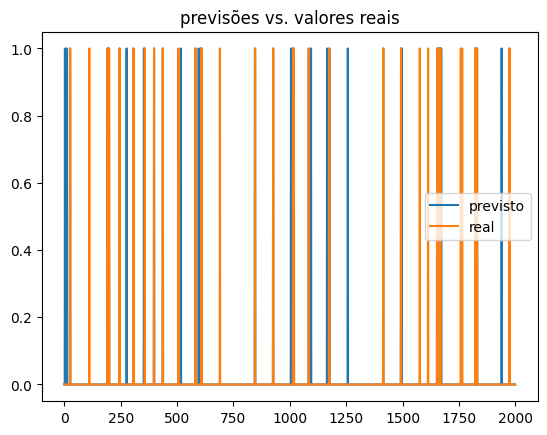

In [ ]:
# plotando as previsões e os valores reais
plt.plot(predictions, label='previsto')
plt.plot(y_test, label='real')
plt.title('previsões vs. valores reais')
plt.legend()
plt.show()

In [ ]:
# métricas de desempenho ebaaaa
print("acurácia:", accuracy_score(y_test, predictions))
print("relatório de classificação:\n", classification_report(y_test, predictions))
print("matriz de confusão:\n", confusion_matrix(y_test, predictions))

acurácia: 0.9825
relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1961
         1.0       0.54      0.67      0.60        39

    accuracy                           0.98      2000
   macro avg       0.77      0.83      0.79      2000
weighted avg       0.98      0.98      0.98      2000

matriz de confusão:
 [[1939   22]
 [  13   26]]
